=== DATA UNDERSTANDING ===

Zeilen: 1987 | Spalten: 9

Merkmale im Datensatz:
- Age                  → Alter 25-35 (metrisch)
- Employment Type      → Job (nominal: Government / Private)
- GraduateOrNot        → Abschluss ja/nein (nominal)
- AnnualIncome         → Jahreseinkommen in ₹ (metrisch) ← wichtigster Prädiktor
- FamilyMembers        → Anzahl Familienmitglieder (metrisch)
- ChronicDiseases      → Chronische Krankheiten 0/1 (nominal)
- FrequentFlyer        → Häufig geflogen ja/nein (nominal)
- EverTravelledAbroad  → War schon mal im Ausland ja/nein (nominal)
- TravelInsurance      → Zielvariable: 0 = nein, 1 = ja (nominal/binär)

Relevanz (meine Einschätzung):
Stark relevant: AnnualIncome, EverTravelledAbroad, FrequentFlyer, Employment Type
Schwach / irrelevant: FamilyMembers, GraduateOrNot, ChronicDiseases, Age



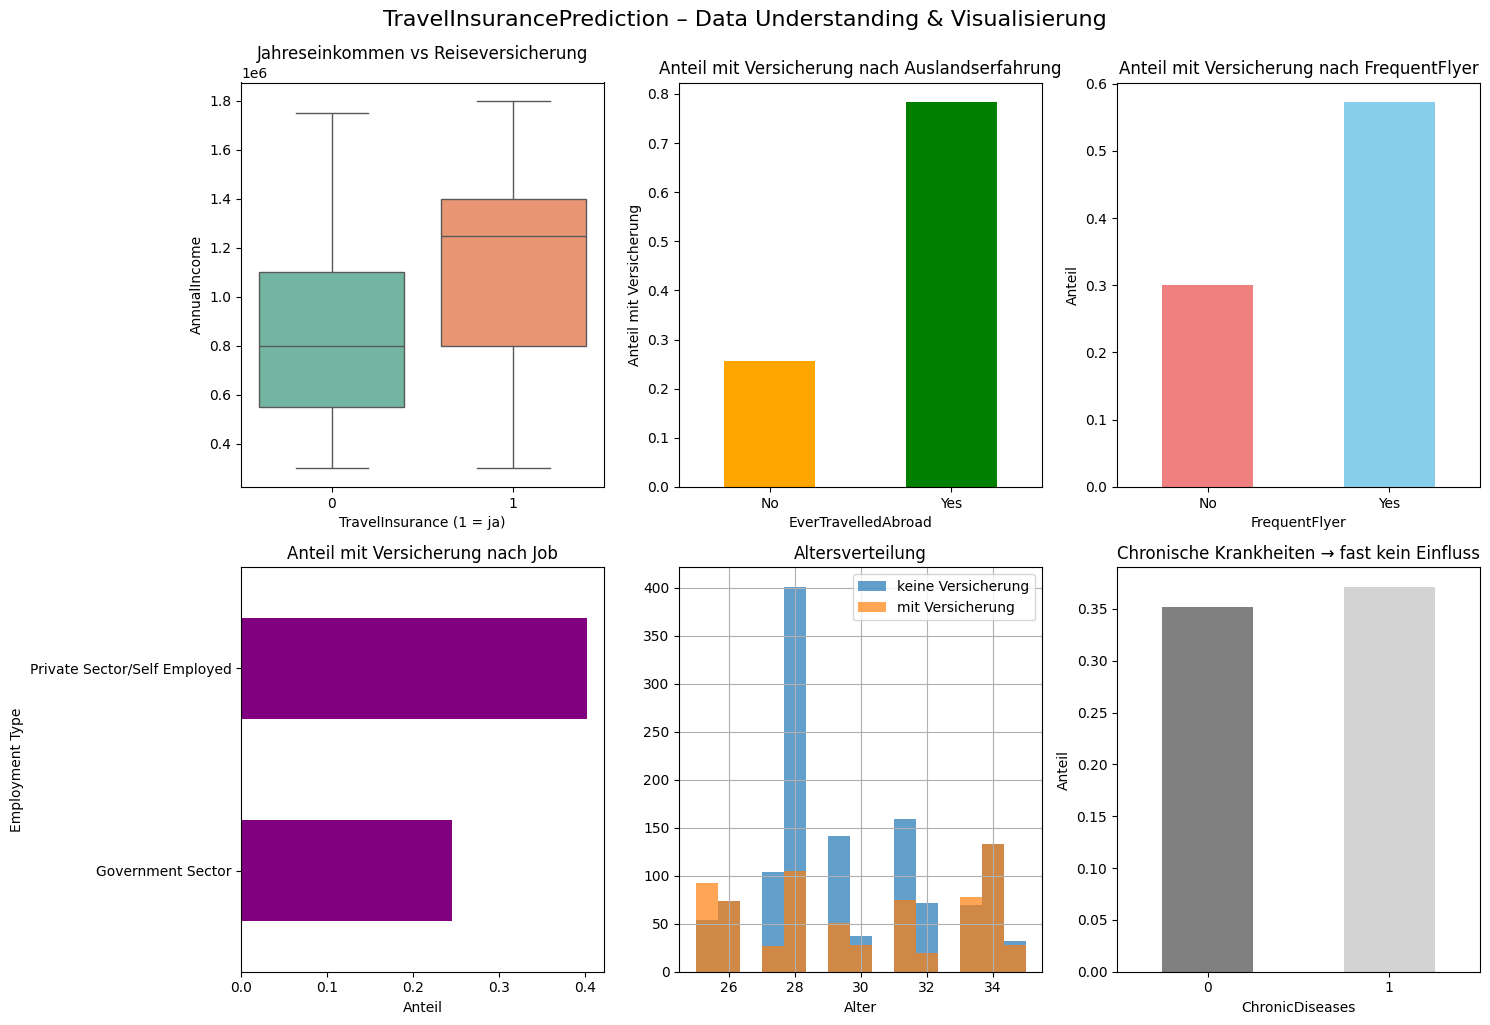


=== Erkenntnisse (kurz & knackig) ===
• Wer mehr verdient → schließt deutlich öfter eine Reiseversicherung ab (klarer Boxplot-Unterschied)
• Wer schon mal im Ausland war → fast immer Versicherung (grüne Säule fast 80%)
• FrequentFlyer & Privatsektor → viel höhere Abschlussquote
• Alter, Familiengröße, Abschluss, chronische Krankheiten → praktisch kein Einfluss
→ Für ein Modell reichen eigentlich nur 4–5 Features aus.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden (erste Index-Spalte weg)
df = pd.read_csv("TravelInsurancePrediction.csv")
df = df.drop(df.columns[0], axis=1)

print("=== DATA UNDERSTANDING ===\n")
print(f"Zeilen: {df.shape[0]} | Spalten: {df.shape[1]}\n")
print("Merkmale im Datensatz:")
print("- Age                  → Alter 25-(metrisch)")
print("- Employment Type      → Job (nominal: Government / Private)")
print("- GraduateOrNot        → Abschluss ja/nein (nominal)")
print("- AnnualIncome         → Jahreseinkommen in ₹ (metrisch) ← wichtigster Prädiktor")
print("- FamilyMembers        → Anzahl Familienmitglieder (metrisch)")
print("- ChronicDiseases      → Chronische Krankheiten 0/1 (nominal)")
print("- FrequentFlyer        → Häufig geflogen ja/nein (nominal)")
print("- EverTravelledAbroad  → War schon mal im Ausland ja/nein (nominal)")
print("- TravelInsurance      → Zielvariable: 0 = nein, 1 = ja (nominal/binär)\n")

print("Relevanz (meine Einschätzung):")
print("Stark relevant: AnnualIncome, EverTravelledAbroad, FrequentFlyer, Employment Type")
print("Schwach / irrelevant: FamilyMembers, GraduateOrNot, ChronicDiseases, Age\n")

# =================================================
# Visualisierung – alles in einer schönen Übersicht
# =================================================

plt.figure(figsize=(15, 10))

# 1 – Einkommen vs Versicherung (Boxplot) – fix: hue=x, legend=False
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x="TravelInsurance", y="AnnualIncome", hue="TravelInsurance", palette="Set2", legend=False)
plt.title("Jahreseinkommen vs Reiseversicherung")
plt.xlabel("TravelInsurance (1 = ja)")

# 2 – Auslandserfahrung
plt.subplot(2, 3, 2)
df.groupby("EverTravelledAbroad")["TravelInsurance"].mean().plot(kind="bar", color=["orange", "green"])
plt.title("Anteil mit Versicherung nach Auslandserfahrung")
plt.ylabel("Anteil mit Versicherung")
plt.xticks(rotation=0)

# 3 – FrequentFlyer
plt.subplot(2, 3, 3)
df.groupby("FrequentFlyer")["TravelInsurance"].mean().plot(kind="bar", color=["lightcoral", "skyblue"])
plt.title("Anteil mit Versicherung nach FrequentFlyer")
plt.ylabel("Anteil")
plt.xticks(rotation=0)

# 4 – Beschäftigungsart
plt.subplot(2, 3, 4)
df.groupby("Employment Type")["TravelInsurance"].mean().plot(kind="barh", color="purple")
plt.title("Anteil mit Versicherung nach Job")
plt.xlabel("Anteil")

# 5 – Alter (Histogramm)
plt.subplot(2, 3, 5)
df[df["TravelInsurance"]==0]["Age"].hist(alpha=0.7, label="keine Versicherung", bins=15)
df[df["TravelInsurance"]==1]["Age"].hist(alpha=0.7, label="mit Versicherung", bins=15)
plt.legend()
plt.title("Altersverteilung")
plt.xlabel("Alter")

# 6 – Chronische Krankheiten (fast egal)
plt.subplot(2, 3, 6)
df.groupby("ChronicDiseases")["TravelInsurance"].mean().plot(kind="bar", color=["gray", "lightgray"])
plt.title("Chronische Krankheiten → fast kein Einfluss")
plt.ylabel("Anteil")
plt.xticks(rotation=0)

plt.tight_layout()
plt.suptitle("TravelInsurancePrediction – Data Understanding & Visualisierung", 
             fontsize=16, y=1.02)
plt.show()

# =================================================
# Kurze Zusammenfassung als Text
# =================================================

print("\n=== Erkenntnisse (kurz & knackig) ===")
print("• Wer mehr verdient → schließt deutlich öfter eine Reiseversicherung ab (klarer Boxplot-Unterschied)")
print("• Wer schon mal im Ausland war → fast immer Versicherung (grüne Säule fast 80%)")
print("• FrequentFlyer & Privatsektor → viel höhere Abschlussquote")
print("• Alter, Familiengröße, Abschluss, chronische Krankheiten → praktisch kein Einfluss")
print("→ Für ein Modell reichen eigentlich nur 4–5 Features aus.")

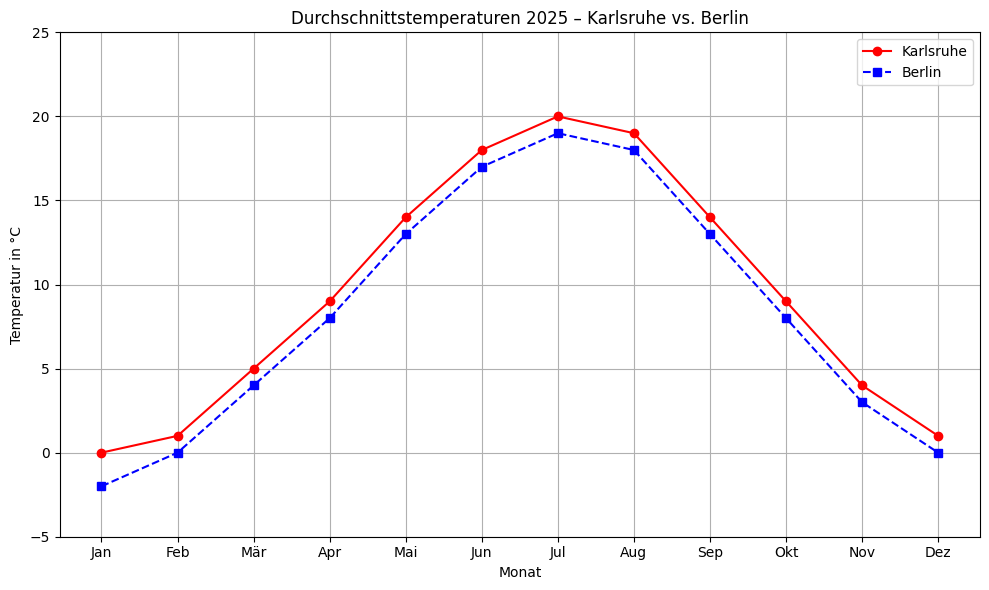

In [3]:
import matplotlib.pyplot as plt

# Daten
monate = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
T_ka = [0, 1, 5, 9, 14, 18, 20, 19, 14, 9, 4, 1]
T_berlin = [-2, 0, 4, 8, 13, 17, 19, 18, 13, 8, 3, 0]

# Plot erstellen
plt.figure(figsize=(10, 6))

plt.plot(monate, T_ka,     marker='o', color='red',   label='Karlsruhe')
plt.plot(monate, T_berlin, marker='s', color='blue',  label='Berlin', linestyle='--')

# Beschriftungen & Co
plt.title('Durchschnittstemperaturen 2025 – Karlsruhe vs. Berlin')
plt.xlabel('Monat')
plt.ylabel('Temperatur in °C')
plt.legend()
plt.grid(True)

# Damits schöner aussieht
plt.ylim(-5, 25)
plt.tight_layout()
plt.show()